In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [9]:
#load and read dataset
df=pd.read_csv('data/jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [23]:
df=df[5::6]
#df

In [29]:
#converting into a foramtted date time
#display value that correspond to particular time
df.index=pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')
df[:4]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-02 12:00:00,02.01.2009 12:00:00,998.91,-3.12,270.13,-4.50,90.1,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00
2009-01-04 00:00:00,04.01.2009 00:00:00,992.93,-1.90,271.81,-6.39,71.2,5.31,3.78,1.53,2.37,3.81,1273.31,1.47,2.50,147.60
2009-01-05 12:00:00,05.01.2009 12:00:00,990.42,-3.65,270.26,-5.54,86.6,4.66,4.04,0.62,2.54,4.08,1278.21,5.49,8.38,17.44
2009-01-07 00:00:00,07.01.2009 00:00:00,994.51,-21.09,252.47,-23.01,84.3,1.13,0.95,0.18,0.59,0.95,1373.91,0.48,1.00,168.40


<Axes: xlabel='Date Time'>

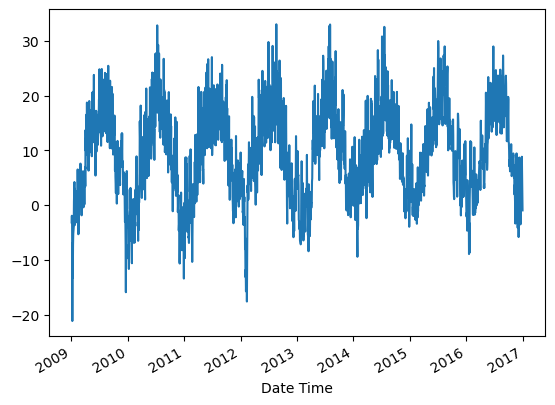

In [31]:
temp=df['T (degC)']
temp.plot()

In [ ]:
#window size is the 5 measurements taken as the basis to make prediction of the next
def to_X_y(df,window_size=5):
    df_as_np=df.to_numpy()
    #input and output value that is to be added to the list
    X=[]
    y=[]
    #control out of bounds
    for i in range(len(df_as_np)-window_size):
        #adding 5 values in each row
        row=[[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label=df_as_np[i+5]
        y.append(label)
    return np.array(X),np.array(y)

In [ ]:
window_size=5
X,y=to_X_y(temp,window_size)
X.shape(), y.shape()